# ADULT CENSUS INCOME PREDICTION

 Subject: Predict whether the income of a person is over 50K or less in a year

1. Load the libraries
2. Load the dataset 
3. Clean and Analyze data 
4. Feature engineering
5. Modeling 
6. Model tuning
7. Final model

#### 1. Load the Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
sns.set(style='white', context='notebook', palette='deep')

#### 2. Load the Dataset

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.shape

(32561, 15)

In [5]:
#check null data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe(include ='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### 3. Clean and Analyze data

3.1. income status distribution

In [8]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

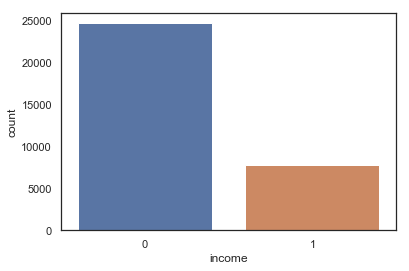

In [9]:
sns.countplot(df['income'],label="Count")

In [10]:

#ratetotal = df['income'==0].count()/len(df['income'])
df['income'].value_counts()/df['income'].count()


0    0.75919
1    0.24081
Name: income, dtype: float64

3.2 Explore Education Num vs Income

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


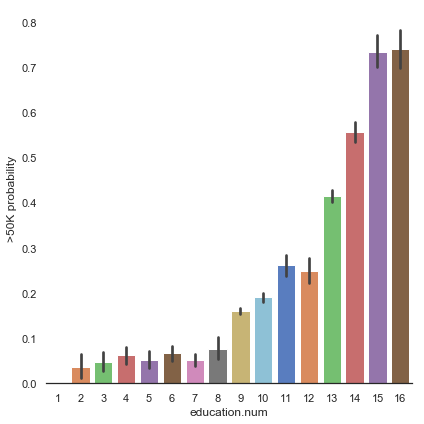

In [11]:
g = sns.factorplot(x="education.num",y="income",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

3.3 Age vs Income

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


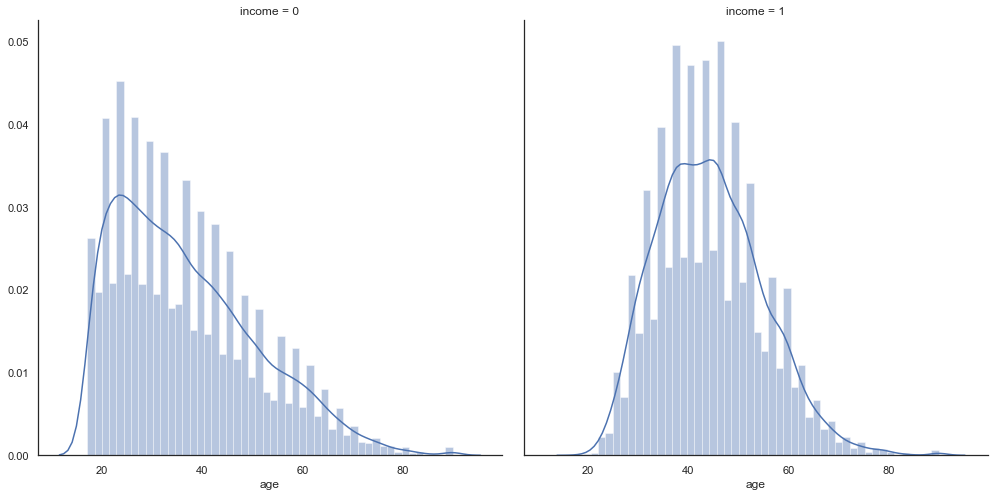

In [12]:
g = sns.FacetGrid(df, col='income',size=7)
g = g.map(sns.distplot, "age")

3.4 Workclass vs Income

Text(0.5,0,'Workclass')

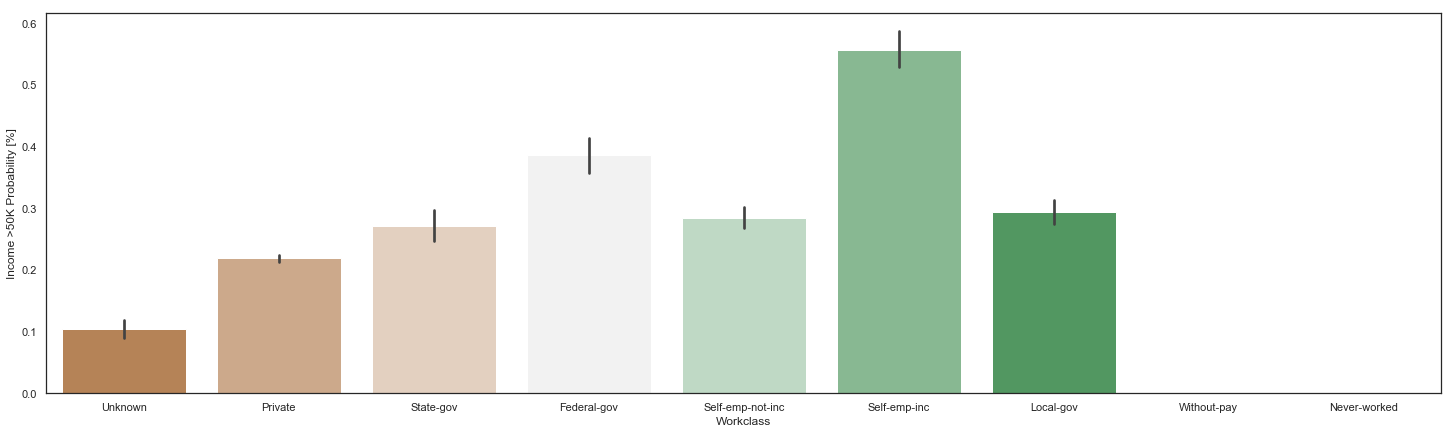

In [13]:
df["workclass"] = df["workclass"].replace(["?"],'Unknown')
fig, ax = plt.subplots(figsize=(25,7))

current_palette = sns.diverging_palette(400, 133, l=60, n=7)

fig = sns.barplot(x='workclass',y='income',data=df,palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Workclass")

#From high to low that self-emp-inc has the highest chance of making over 50k with a 54% chance, while the last known 'private' has a 22% of making over 50k.

3.5 Marital Status vs Income

Text(0.5,0,'Marital Status')

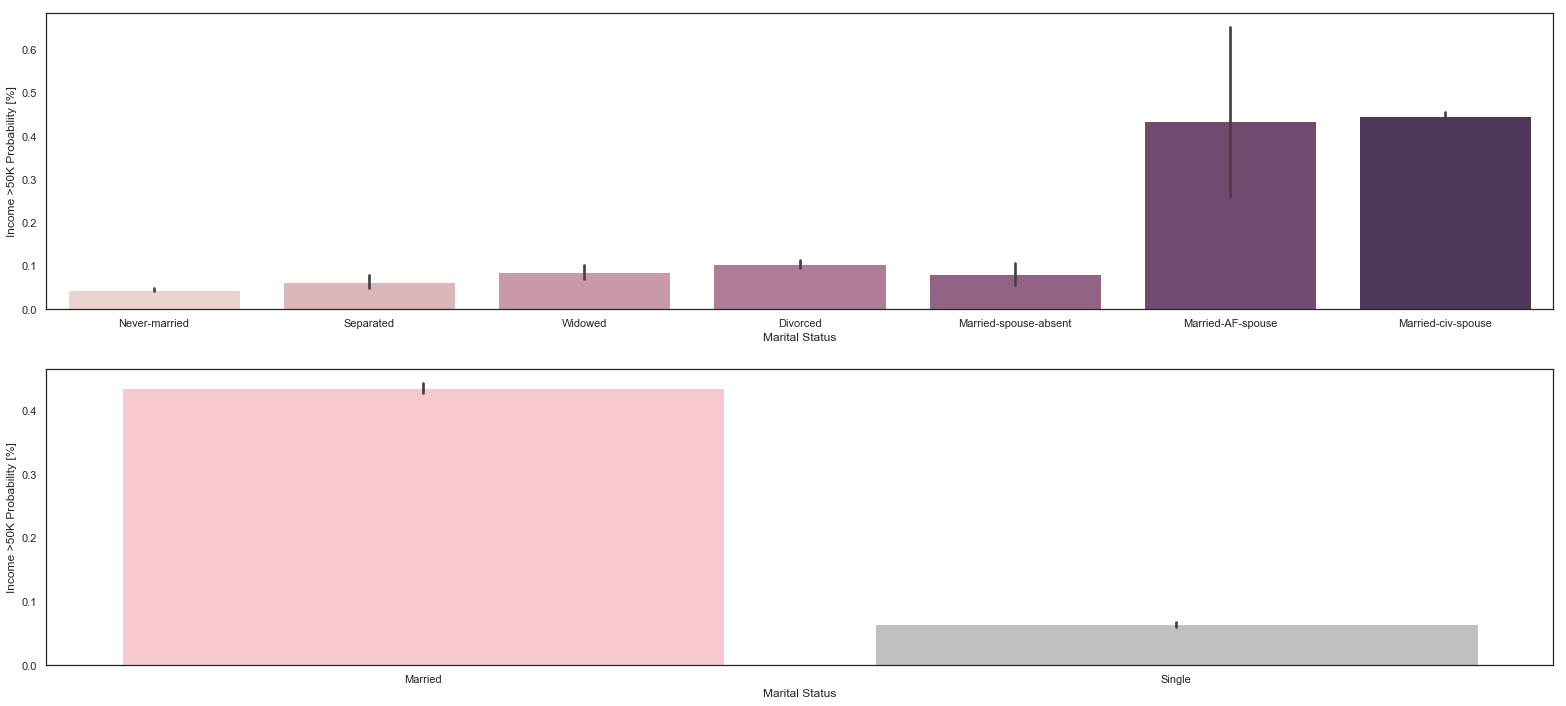

In [14]:
fig, axe = plt.subplots(2,1,figsize=(27,12))
current_palette =sns.cubehelix_palette(8)

fig = sns.barplot(x='marital.status',y='income',data=df,ax=axe[0],order =['Never-married','Separated','Widowed','Divorced','Married-spouse-absent','Married-AF-spouse','Married-civ-spouse'],palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Marital Status")

### Map to two catagories

dfCopy= df.copy()
dfCopy["marital.status"] = dfCopy["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], '1')
dfCopy["marital.status"] = dfCopy["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], '0')
dfCopy["marital.status"] = dfCopy["marital.status"].astype(int)

fig = sns.barplot(x='marital.status',y='income',data=dfCopy,ax=axe[1], order=[1,0],palette=['pink','silver'])

fig.set(xticklabels =['Married','Single'])
fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Marital Status")



In [15]:
#rate = dfCopy['marital.status'].value_counts()/dfCopy['marital.status'].count()
#rate

rate = dfCopy[['marital.status','income']].groupby(['marital.status'],as_index=False).mean().sort_values(by='income', ascending=False)
rate

,marital.status,income
1,1,0.436920
0,0,0.064454


There is a big difference based on marital status:

Married individules has a probability of 43.69% of earning over 50K on average, on the other hand, the probability for single individules earn over 50K is only 6.45%


3.6 Relationship vs Income

Text(0.5,0,'Relationship')

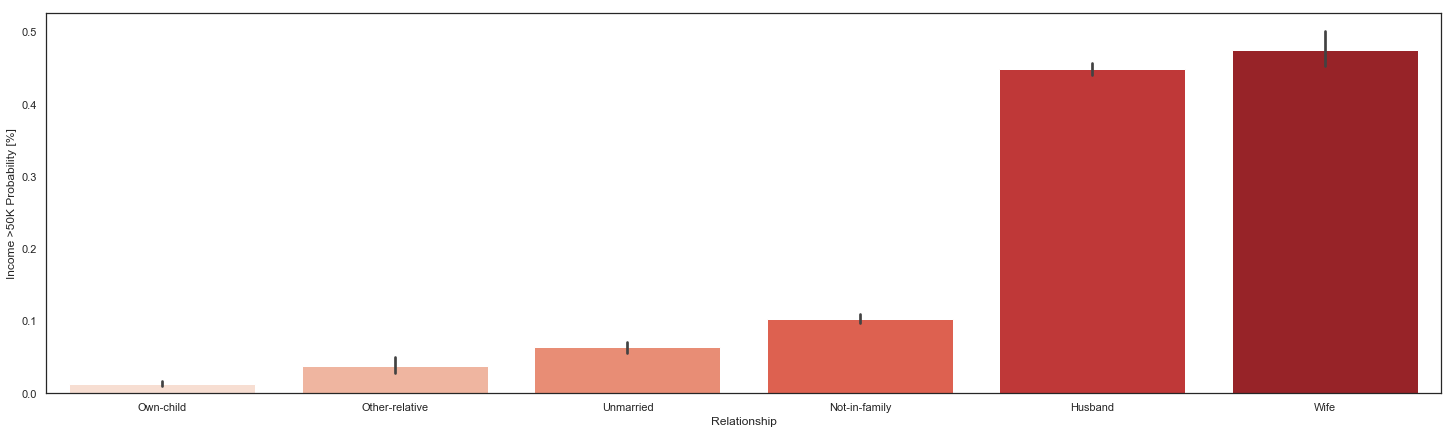

In [16]:
fig, ax = plt.subplots(figsize=(25,7))

current_palette = sns.color_palette("Reds")

fig = sns.barplot(x='relationship',y='income',data=df, order=['Own-child','Other-relative','Unmarried','Not-in-family','Husband','Wife'], palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Relationship")

After all, we can conclude that married people have a significant higher probability of earning over 50K
than other individules, which is the same results derive from 'marital status vs income'

Also, we can see that Wivies have a higher probability of earning more than 50K than Husbands 


#### 4. Correlation matrix (numeric data)

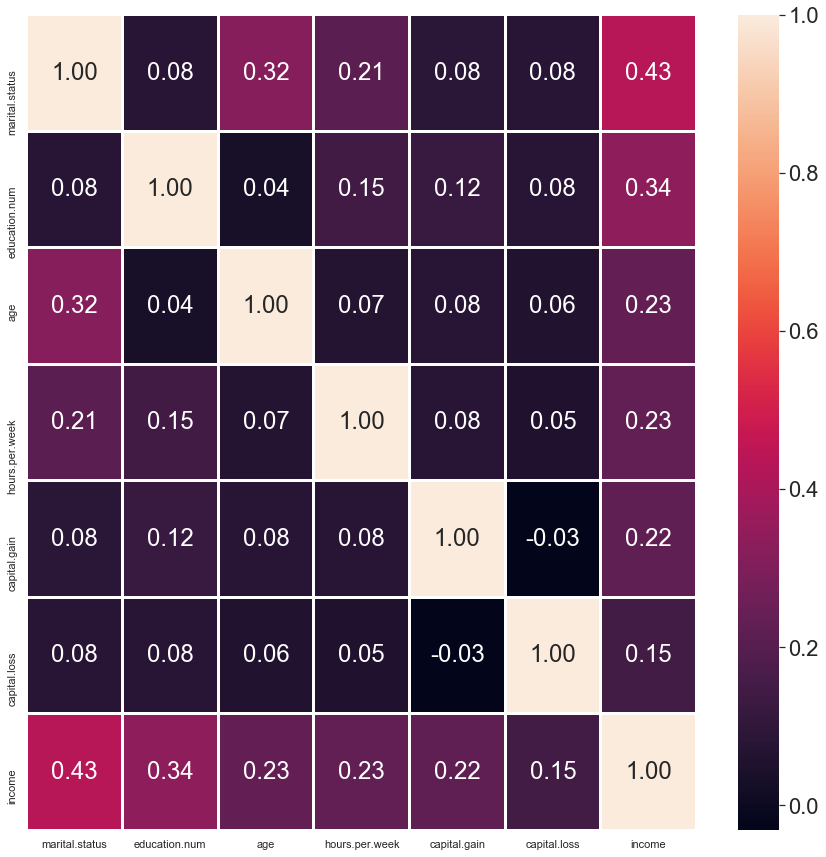

In [17]:
numeric_columns = ['marital.status','education.num','age','hours.per.week','capital.gain','capital.loss','income']

fig, axe = plt.subplots(figsize=(15,15))

sns.set(font_scale=2)
sns.heatmap(dfCopy[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2)

From the heatmap we are able to find the most relevant attributes are: 

marital.ststus, education.num, age, hours.per.week

#### 4. Feature engineering 

drop the unecessary columns, get the dataset ready for modeling

In [18]:
# Married:0, Single:1
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 0)
df["marital.status"] = df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 1)


In [19]:
df.drop(columns=["sex","workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)


In [20]:
df.head(5)

,age,fnlwgt,education.num,marital.status,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,1,0,4356,40,0
1,82,132870,9,1,0,4356,18,0
2,66,186061,10,1,0,4356,40,0
3,54,140359,4,1,0,3900,40,0
4,41,264663,10,1,0,3900,40,0


In [21]:
df.shape

(32561, 8)

#### 5. Modeling

In [22]:
X = df.drop('income',axis=1)
y = df['income']

In [23]:
X.shape

(32561, 7)

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler

X_train_unscaled , X_test_unscaled, y_train, y_test = train_test_split(X, y, random_state=2)

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

#from xgboost import XGBClassifier


In [27]:

outcome = []
Modelnames = []
models = []
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, max_features=4)))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))

#kfoldCV = StratifiedKFold(n_splits=5, random_state=2)
#xgb_model = XGBClassifier(n_estimators=25)
#results = cross_val_score(xgb_model, train_X, train_y, cv=kfoldCV)
#print("XGBClassifier: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#outcome.append(results)
#Modelnames.append("XGBClassifier")

for name, model in models:
    kfoldCV = KFold(n_splits=5, random_state=2)
    cv_r = cross_val_score(model, X_train, y_train, cv=kfoldCV, scoring='roc_auc')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

Random Forest Classifier: 88.40% (0.79%)
Linear Discriminant Analysis: 88.19% (0.54%)
Decision Tree Classifier: 73.64% (0.72%)
Logistic Regression: 88.92% (0.56%)


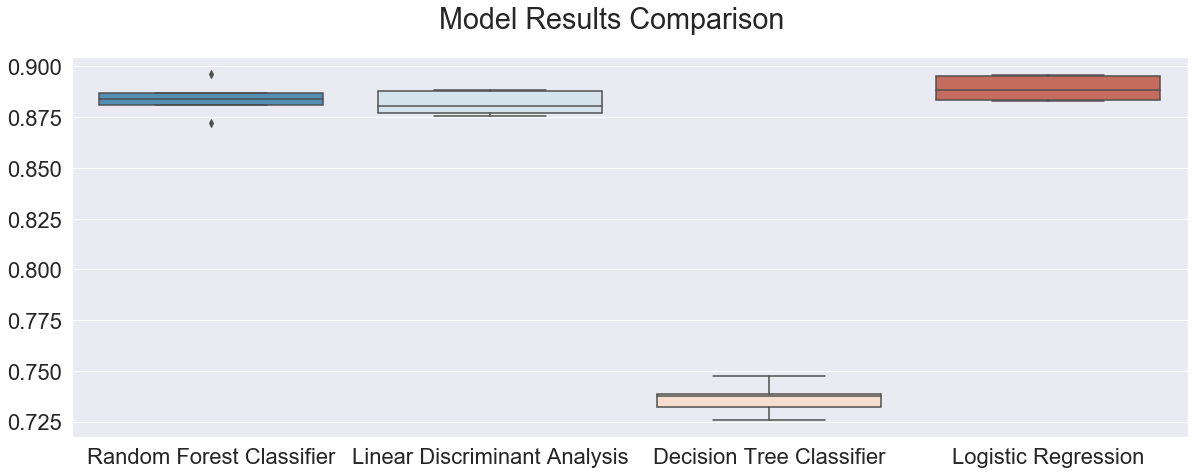

In [28]:
fig, ax = plt.subplots(figsize=(20,7))
df1 ={'Names': Modelnames,'Results': outcome}
fig.suptitle('Model Results Comparison')
current_palette = sns.color_palette("RdBu_r", 4)
sns.boxplot(x='Names',y='Results',data=df1,palette = current_palette)


#### 6.Model Tuning, Final Model

In [32]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
#logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv = GridSearchCV(logreg, grid, scoring='roc_auc')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}


In [43]:
logreg=LogisticRegression(solver='lbfgs', C=1000.0, penalty='l2')
cv_r2 = cross_val_score(logreg, X_train, y_train, cv=kfoldCV, scoring='roc_auc')
print("%s: %.2f%% (%.2f%%)" % ('logreg_auc_score', cv_r2.mean()*100, cv_r2.std()*100))

logreg_auc_score: 89.26% (0.58%)


Random forest

In [48]:
rfc = RandomForestClassifier(n_estimators=50, max_features=4,random_state=2)
param_grid = { 
              "max_depth": [3, None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              'n_estimators': [10,20,30,50,200,300]
}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_cv.fit(X_train, y_train)
print(rfc_cv.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 200}


In [51]:
rfc=RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=3,n_estimators=200)
cv_r3 = cross_val_score(rfc, X_train, y_train, cv=kfoldCV, scoring='roc_auc')
print("%s: %.2f%% (%.2f%%)" % ('rfc_auc_score', cv_r3.mean()*100, cv_r2.std()*100))

rfc_auc_score: 89.70% (0.58%)
